In [3]:
import scipy.stats as sts
from scipy.stats import bootstrap, norm
import matplotlib.pyplot as plt
import numpy as np
from astropy import stats
from sklearn.linear_model import LinearRegression
import pandas as pd
import scipy as sp
import seaborn as sns

84.83105736559118 ± 8.971676137356624
1.7532691860179228 ± 0.0727221273042363
61.62505130744358 ± 8.627576329682082
1.6182028495269967 ± 0.06847876509656999


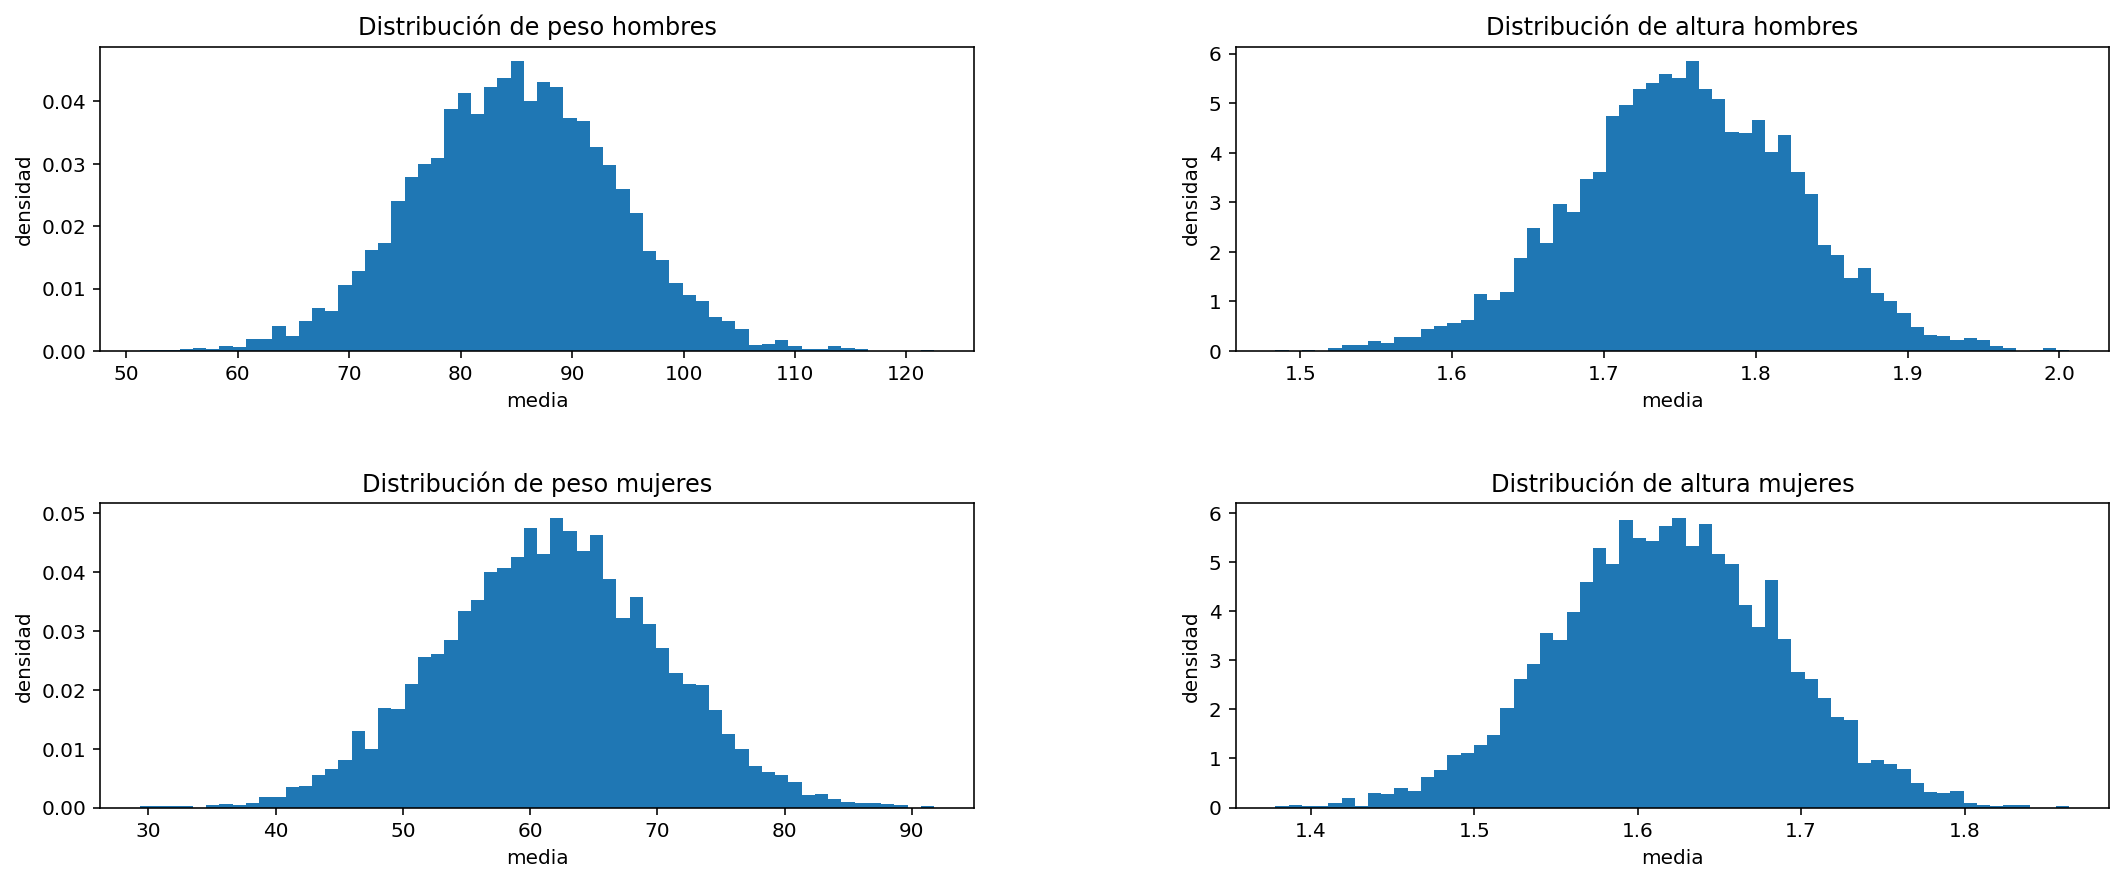

In [4]:
data = pd.read_csv("weight-height.csv")
male = data.loc[data['Gender'] == 'Male']

weightm =0.453592*male["Weight"] #kilograms
heightm = 2.54*male["Height"]/100 #metros
IMCm = weightm/heightm**2
x = np.linspace(min(weightm), max(weightm), len(weightm))

female =data.loc[data['Gender'] == 'Female']
weightf = 0.453592*female["Weight"]
heightf = 2.54*female["Height"]/100

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(18,7))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax[0,0].hist(weightm, bins = 60, density = True)
ax[0,0].set_title('Distribución de peso hombres')
ax[0,0].set_xlabel('media')
ax[0,0].set_ylabel('densidad')

ax[0,1].hist(heightm, bins = 60, density = True)
ax[0,1].set_title('Distribución de altura hombres')
ax[0,1].set_xlabel('media')
ax[0,1].set_ylabel('densidad')

ax[1,0].hist(weightf, bins = 60, density = True)
ax[1,0].set_title('Distribución de peso mujeres')
ax[1,0].set_xlabel('media')
ax[1,0].set_ylabel('densidad')

ax[1,1].hist(heightf, bins = 60, density = True)
ax[1,1].set_title('Distribución de altura mujeres')
ax[1,1].set_xlabel('media')
ax[1,1].set_ylabel('densidad')

print(np.mean(weightm), "\u00B1", np.std(weightm))
print(np.mean(heightm), "\u00B1", np.std(heightm))

print(np.mean(weightf), "\u00B1", np.std(weightf))
print(np.mean(heightf), "\u00B1", np.std(heightf))

In [5]:
weight_samplem = weightm.sample(n = 3000)
scott_range, binwidth = stats.scott_bin_width(weight_samplem, return_bins=True)

weight_samplem = (weight_samplem,)


bootstrap_cimw = bootstrap(weight_samplem, np.mean, confidence_level=0.95, random_state=1, method='percentile',n_resamples=9999)

height_samplem = heightm.sample(n = 3000)

height_samplem = (height_samplem,)
bootstrap_cimh = bootstrap(height_samplem, np.mean, confidence_level=0.95, random_state=1, method='percentile',n_resamples=9999)

meanmh = np.mean(bootstrap_cimh.bootstrap_distribution)
stdmh = bootstrap_cimh.standard_error

meanmw = np.mean(bootstrap_cimw.bootstrap_distribution)
stdmw = bootstrap_cimw.standard_error

In [6]:
X, Y = weightm.values.reshape(-1,1) , heightm.values.reshape(-1,1)

# Regresor lineal
modelo = LinearRegression()
# Se entrena el modelo con los datos
modelo.fit(X, Y)

# Una vez ha sido entrenado, se puede calcular el resultado
# para una nueva entrada
Y_prediccionm = modelo.predict(X)
r_sq = modelo.score(X, Y)
r_sq

0.744732493159145

In [7]:
std= np.std(Y_prediccionm)
sigma = 1.96*std/np.sqrt(len(weightm))

ConfidenceInterval(low=84.45541656823956, high=85.09636009261357) ConfidenceInterval(low=1.749180566211823, high=1.7544280723480017)
distribuicion de peso= 84.77513141439788 ± 0.16317170077282214
distribuicion de altura= 1.7518269744322563 ± 0.0013403380315294687


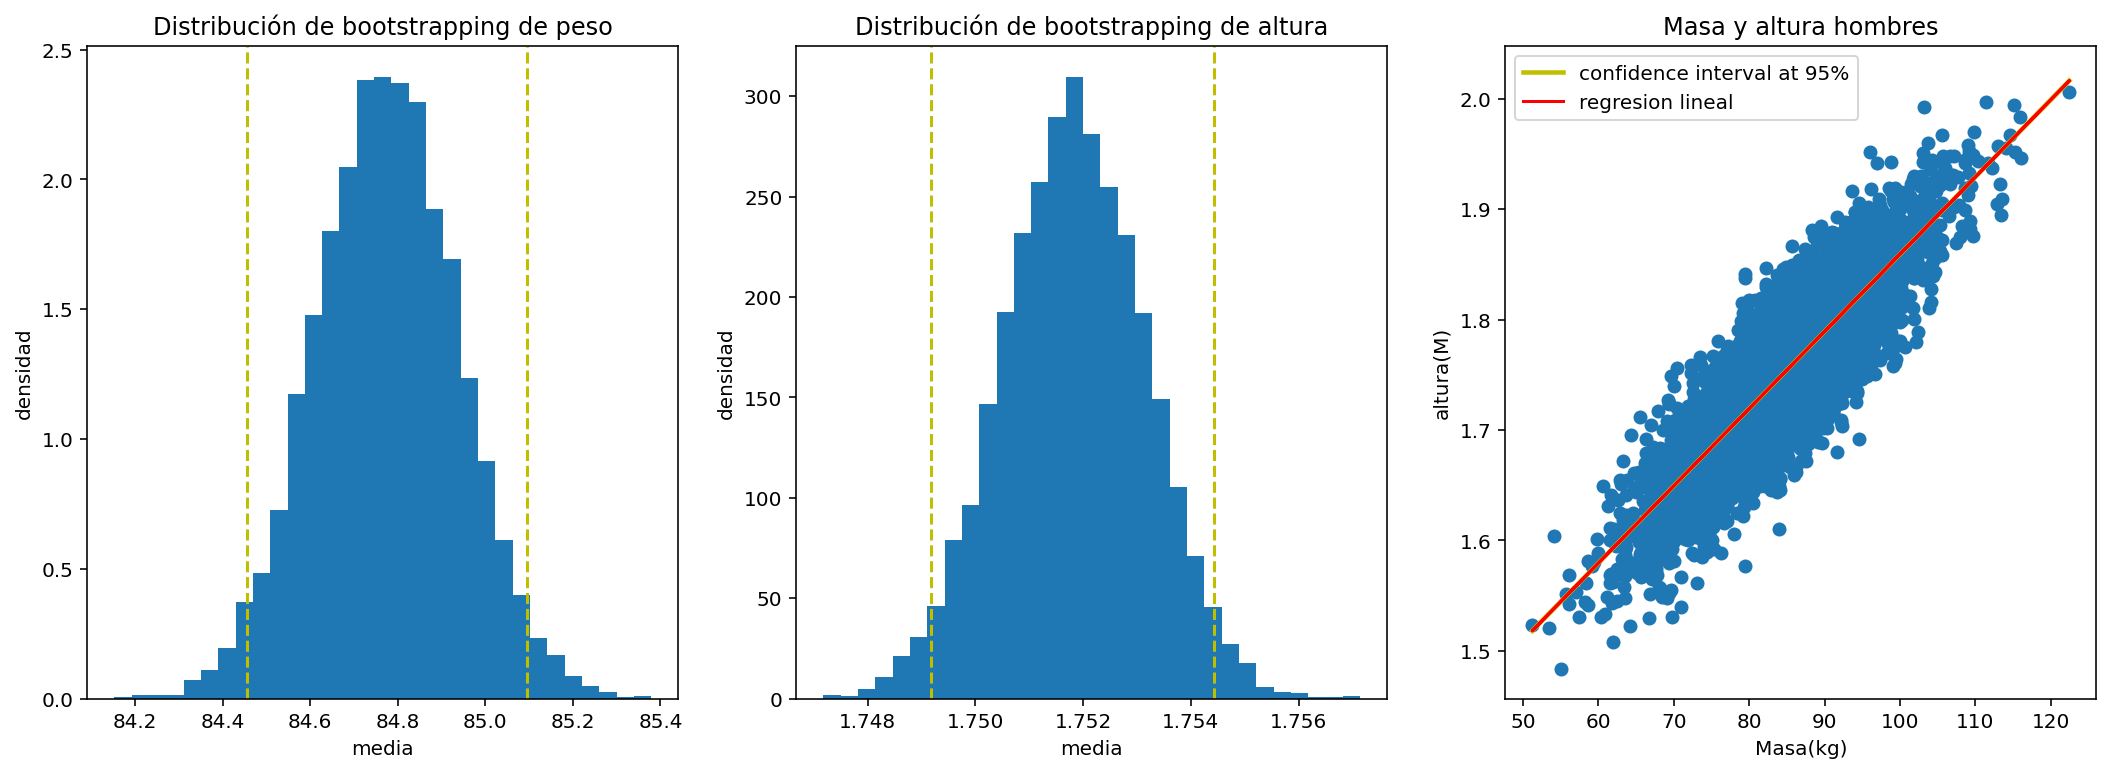

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,6))


print(bootstrap_cimw.confidence_interval,bootstrap_cimh.confidence_interval)
print("distribuicion de peso=", meanmw, "\u00B1", stdmw)
print("distribuicion de altura=", meanmh, "\u00B1", stdmh)

ax[0].hist(bootstrap_cimw.bootstrap_distribution, bins = len(binwidth), density = True)
ax[0].axvline(bootstrap_cimw.confidence_interval[0], color = "y", ls ="--")
ax[0].axvline(bootstrap_cimw.confidence_interval[1], color = "y", ls ="--")
ax[0].set_title('Distribución de bootstrapping de peso')
ax[0].set_xlabel('media')
ax[0].set_ylabel('densidad')

ax[1].hist(bootstrap_cimh.bootstrap_distribution, bins = len(binwidth), density = True)
ax[1].axvline(bootstrap_cimh.confidence_interval[0], color = "y", ls ="--")
ax[1].axvline(bootstrap_cimh.confidence_interval[1], color = "y", ls ="--")
ax[1].set_title('Distribución de bootstrapping de altura')
ax[1].set_xlabel('media')
ax[1].set_ylabel('densidad')

ax[2].scatter(weightm,heightm)
sns.regplot(x=weightm, y=heightm, ci=95, n_boot=9999, color='y',scatter = False,ax = ax[2], label='confidence interval at 95%')
#ax[2].plot(X,Y_prediccionm+ sigma, color = "y", ls = "--")
#ax[2].plot(X,Y_prediccionm- sigma, color = "y",label='confidence interval at 95%', ls = "--")
ax[2].plot(X,Y_prediccionm, color = "r",label='regresion lineal')
ax[2].set_title('Masa y altura hombres')
ax[2].set_xlabel('Masa(kg)')
ax[2].set_ylabel('altura(M)')
ax[2].legend()
plt.show()

In [9]:
IMCF = weightf/heightf**2

weight_samplef = weightf.sample(n = 3000)
scott_range, binwidth = stats.scott_bin_width(weight_samplef, return_bins=True)

weight_samplef = (weight_samplef,)
bootstrap_cifw = bootstrap(weight_samplef, np.mean, confidence_level=0.95, random_state=1, method='percentile',n_resamples=9999)

height_samplef = heightf.sample(n = 3000)

height_samplef = (height_samplef,)
bootstrap_cifh = bootstrap(height_samplef, np.mean, confidence_level=0.95, random_state=1, method='percentile',n_resamples=9999)

meanfh = np.mean(bootstrap_cifh.bootstrap_distribution)
stdfh = bootstrap_cifh.standard_error

meanfw = np.mean(bootstrap_cifw.bootstrap_distribution)
stdfw = bootstrap_cifw.standard_error

In [10]:
X, Y = weightf.values.reshape(-1,1) , heightf.values.reshape(-1,1)

# Regresor lineal
modelo = LinearRegression()
# Se entrena el modelo con los datos
modelo.fit(X, Y)

# Una vez ha sido entrenado, se puede calcular el resultado
# para una nueva entrada
Y_prediccion = modelo.predict(X)

std= np.std(Y_prediccionm)
sigma = 1.96*std/np.sqrt(len(weightm))

ConfidenceInterval(low=61.24417257430462, high=61.86372422662055) ConfidenceInterval(low=1.6164949629173717, high=1.6213072983498589)
distribuicion de peso= 61.558047808651274 ± 0.15918201759079498
distribuicion de altura= 1.618885090407176 ± 0.001227253043224867


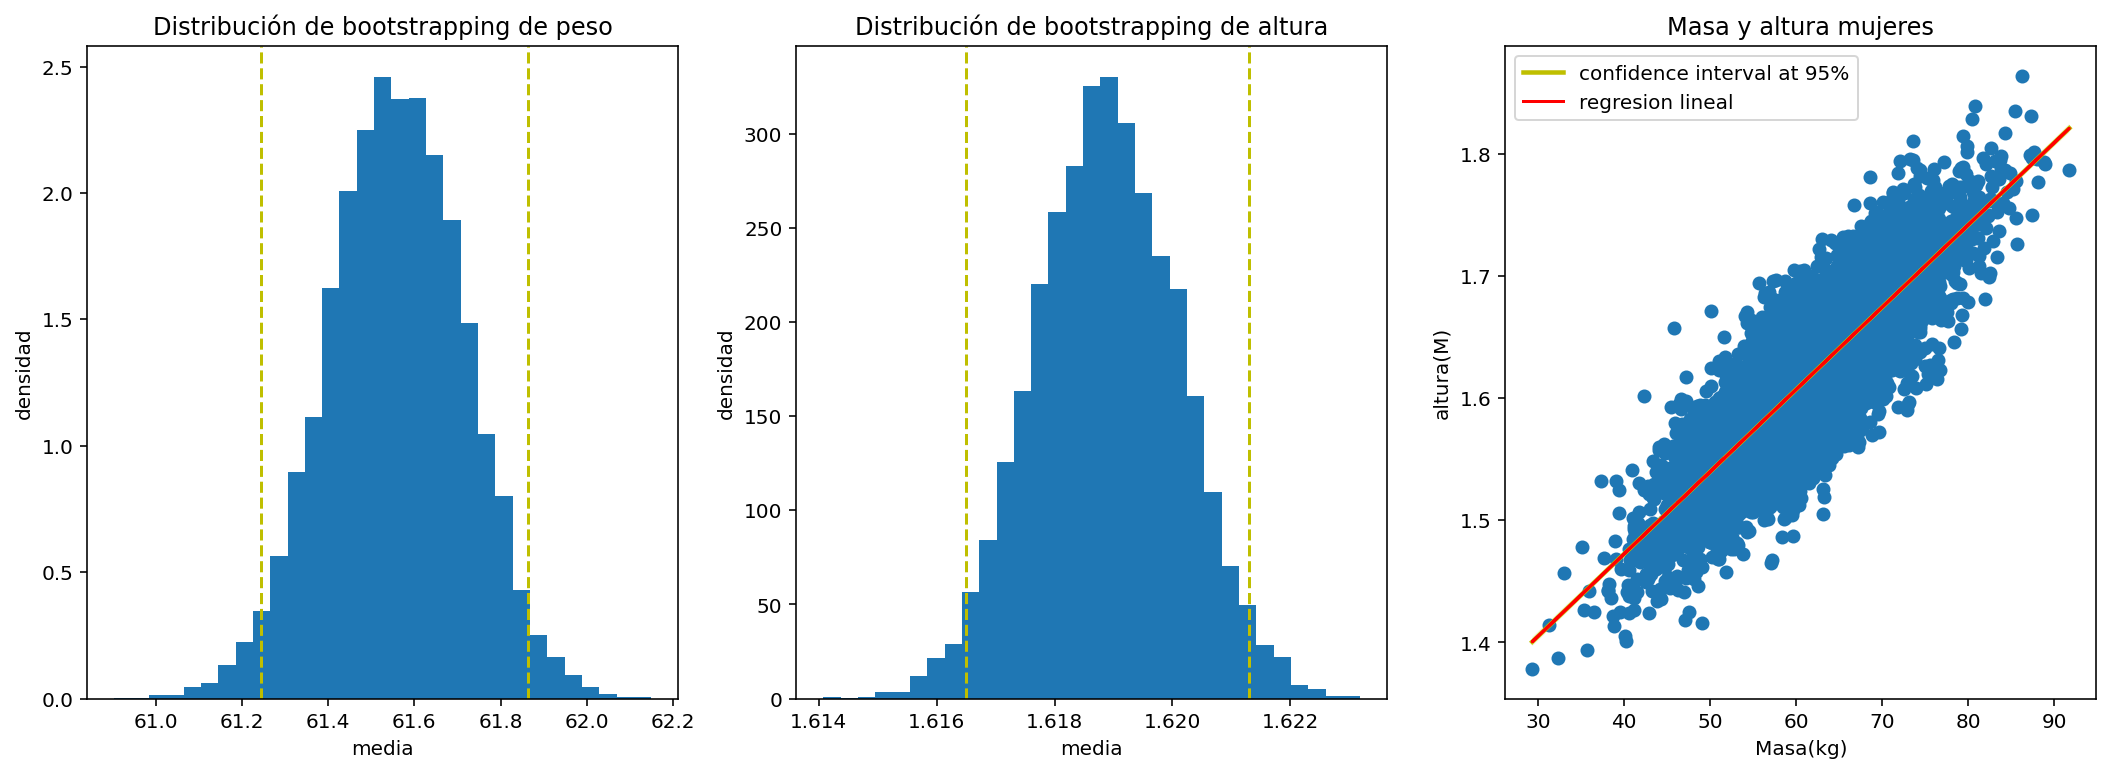

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(18,6))

print(bootstrap_cifw.confidence_interval,bootstrap_cifh.confidence_interval)
print("distribuicion de peso=", meanfw, "\u00B1", stdfw)
print("distribuicion de altura=", meanfh, "\u00B1", stdfh)

ax[0].hist(bootstrap_cifw.bootstrap_distribution, bins = len(binwidth), density = True)
ax[0].axvline(bootstrap_cifw.confidence_interval[0], color = "y", ls ="--")
ax[0].axvline(bootstrap_cifw.confidence_interval[1], color = "y", ls ="--")
ax[0].set_title('Distribución de bootstrapping de peso')
ax[0].set_xlabel('media')
ax[0].set_ylabel('densidad')

ax[1].hist(bootstrap_cifh.bootstrap_distribution, bins = len(binwidth), density = True)
ax[1].axvline(bootstrap_cifh.confidence_interval[0], color = "y", ls ="--")
ax[1].axvline(bootstrap_cifh.confidence_interval[1], color = "y", ls ="--")
ax[1].set_title('Distribución de bootstrapping de altura')
ax[1].set_xlabel('media')
ax[1].set_ylabel('densidad')

ax[2].scatter(weightf,heightf)
sns.regplot(x=weightf, y=heightf, ci=95, n_boot=9999, color='y',scatter = False,ax = ax[2],label='confidence interval at 95%')
#ax[2].plot(X,Y_prediccion- sigma, color = "y",label='confidence interval at 95%', ls = "--")
#ax[2].plot(X,Y_prediccion+ sigma, color = "y" , ls = "--")
ax[2].plot(X,Y_prediccion, color = "r",label='regresion lineal')
ax[2].set_title('Masa y altura mujeres')
ax[2].set_xlabel('Masa(kg)')
ax[2].set_ylabel('altura(M)')
ax[2].legend()
plt.show()

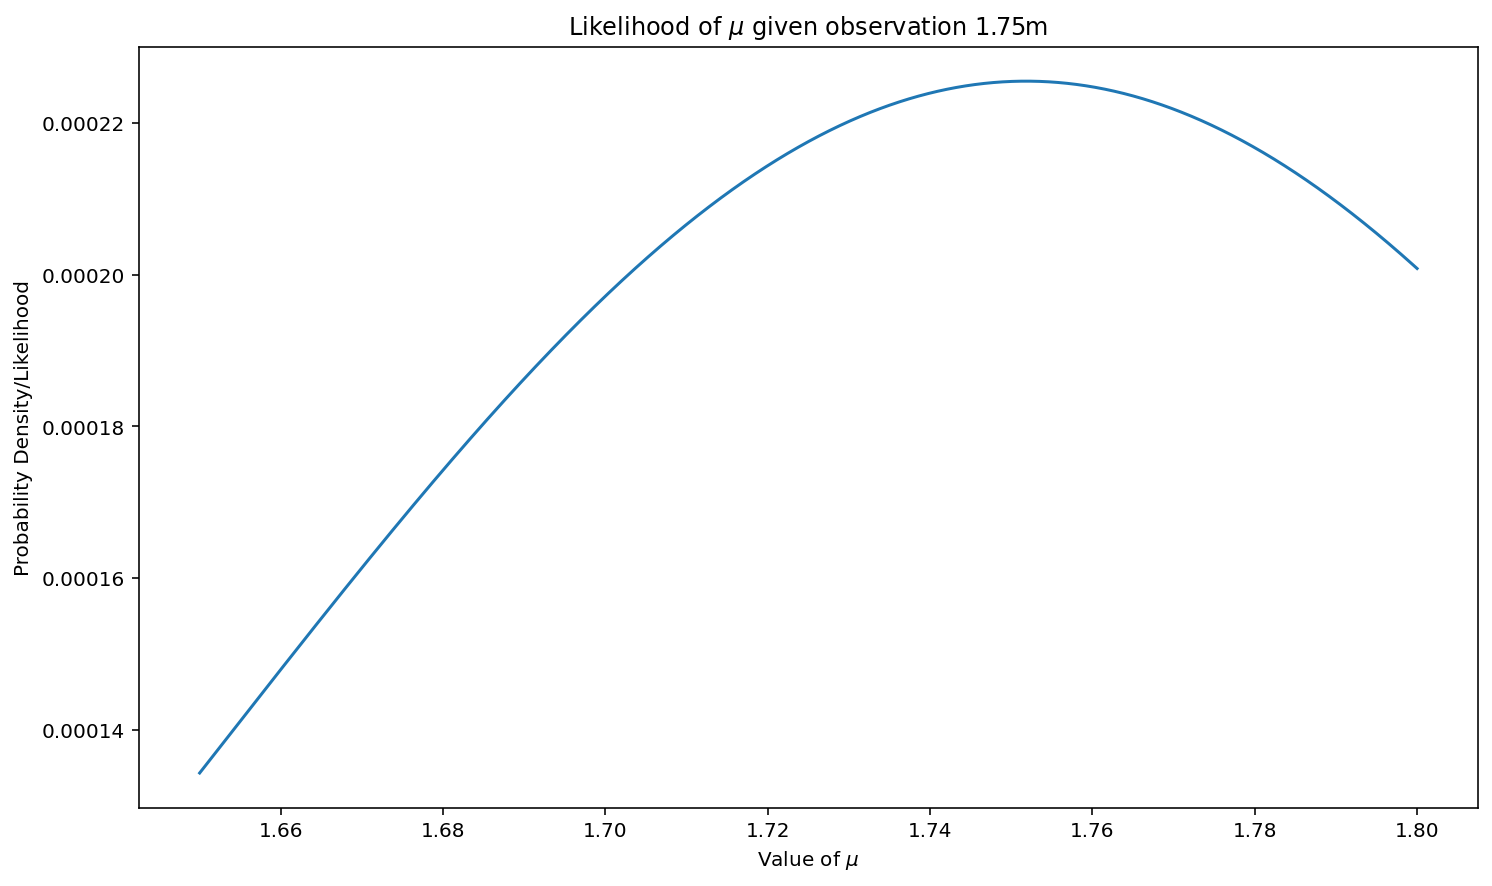

In [12]:
mu = np.linspace(1.65, 1.8, num = 5000)

def likelihood_func(datum, mu):
    likelihood_out = sts.norm.pdf(datum, mu, scale = 0.1) #Note that mu here is an array of values, so the output is also an array!
    return likelihood_out/likelihood_out.sum()

def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = sp.integrate.cumtrapz(distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return parameter_values[percentile_index]


likelihood_out = likelihood_func(meanmh, mu)

plt.plot(mu, likelihood_out)
plt.title("Likelihood of $\mu$ given observation 1.75m")
plt.ylabel("Probability Density/Likelihood")
plt.xlabel("Value of $\mu$")

plt.show()

Mean after observing 1000 data: 1.7515134906753063 Standard deviation: 0.0031606977062050693


Mean after observing 2000 data: 1.7543753157874749 Standard deviation: 0.0027374724874768422


Mean after observing 3000 data: 1.753542757258992 Standard deviation: 0.0024711491140664687


Mean after observing 4000 data: 1.7535384029234264 Standard deviation: 0.0022813980904297167


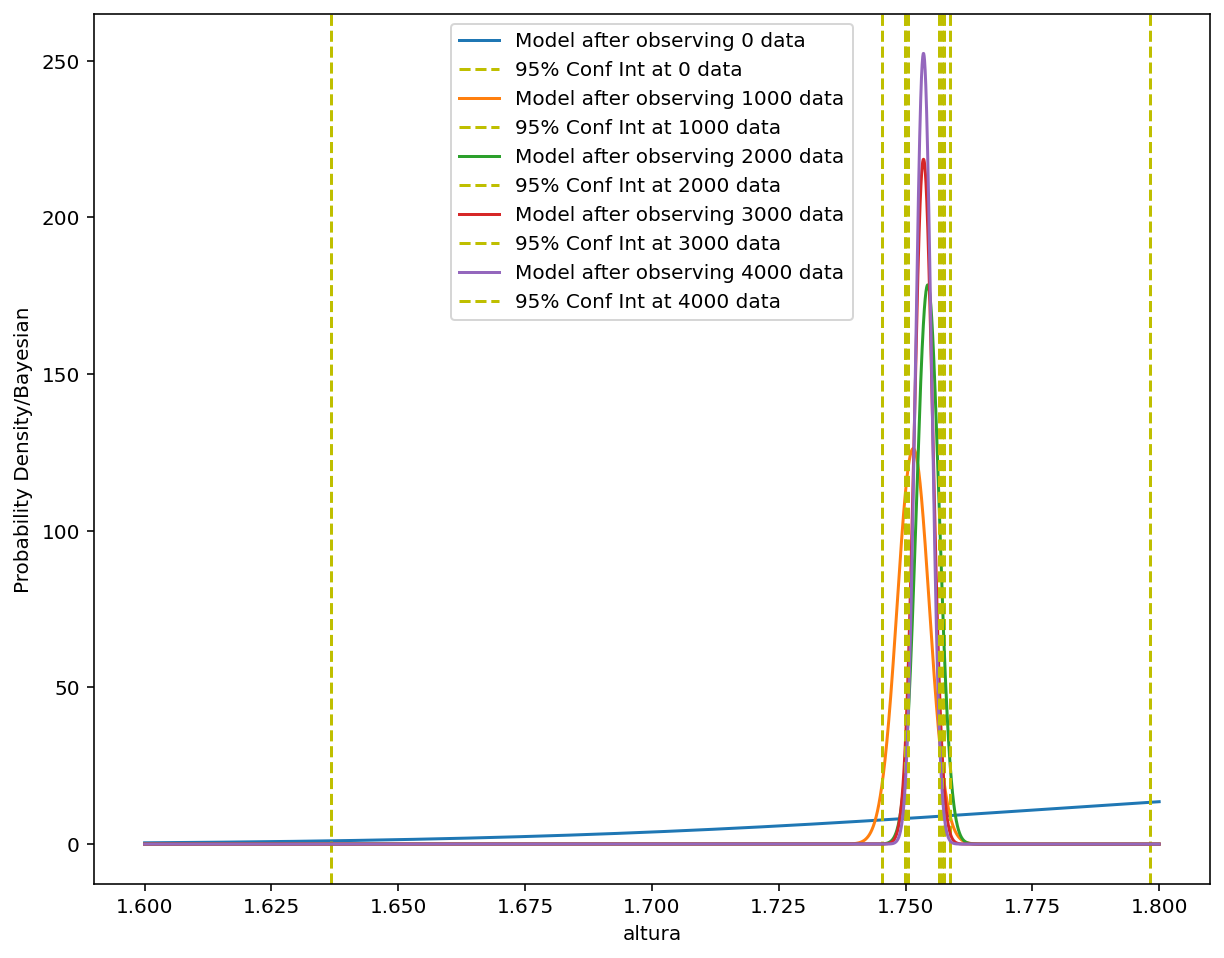

In [13]:
mu = np.linspace(1.6, 1.8, num = 5000)
uniform_dist = sts.uniform.pdf(mu) + 1
heights_data = heightm #or heightf

prior = uniform_dist
posterior_dict = {}
means = []
sum_squares = 0
num_observations = 0

plt.figure(figsize = (10, 8))

for ind, datum in enumerate(heights_data):
    likelihood = likelihood_func(datum, mu)
    unnormalized_posterior = prior * likelihood
    normalized_posterior = unnormalized_posterior/sp.integrate.trapz(unnormalized_posterior, mu)
    prior = normalized_posterior
    posterior_dict[ind] = normalized_posterior
    if ind%1000 == 0:

        plt.plot(mu, normalized_posterior, label = f'Model after observing {ind} data')
        plt.axvline(x = compute_percentile(mu, posterior_dict[ind], 0.025), ls = '--', color = "y", label = f'95% Conf Int at {ind} data')
        plt.axvline(x = compute_percentile(mu, posterior_dict[ind], 0.975), ls = '--', color = 'y')
        plt.xlabel("altura")
        plt.ylabel("Probability Density/Bayesian")

    if ind != 0 and ind % 1000 == 0:
        mean = sp.integrate.trapz(mu * normalized_posterior, mu)
        means.append(mean)
        sum_squares += sp.integrate.trapz(normalized_posterior * ((mu - mean) ** 2), mu)
        num_observations += 1
        std_dev = (sum_squares / num_observations) ** 0.5
        print(f"Mean after observing {ind} data:", means[-1], "Standard deviation:", std_dev )
plt.legend()
plt.show()


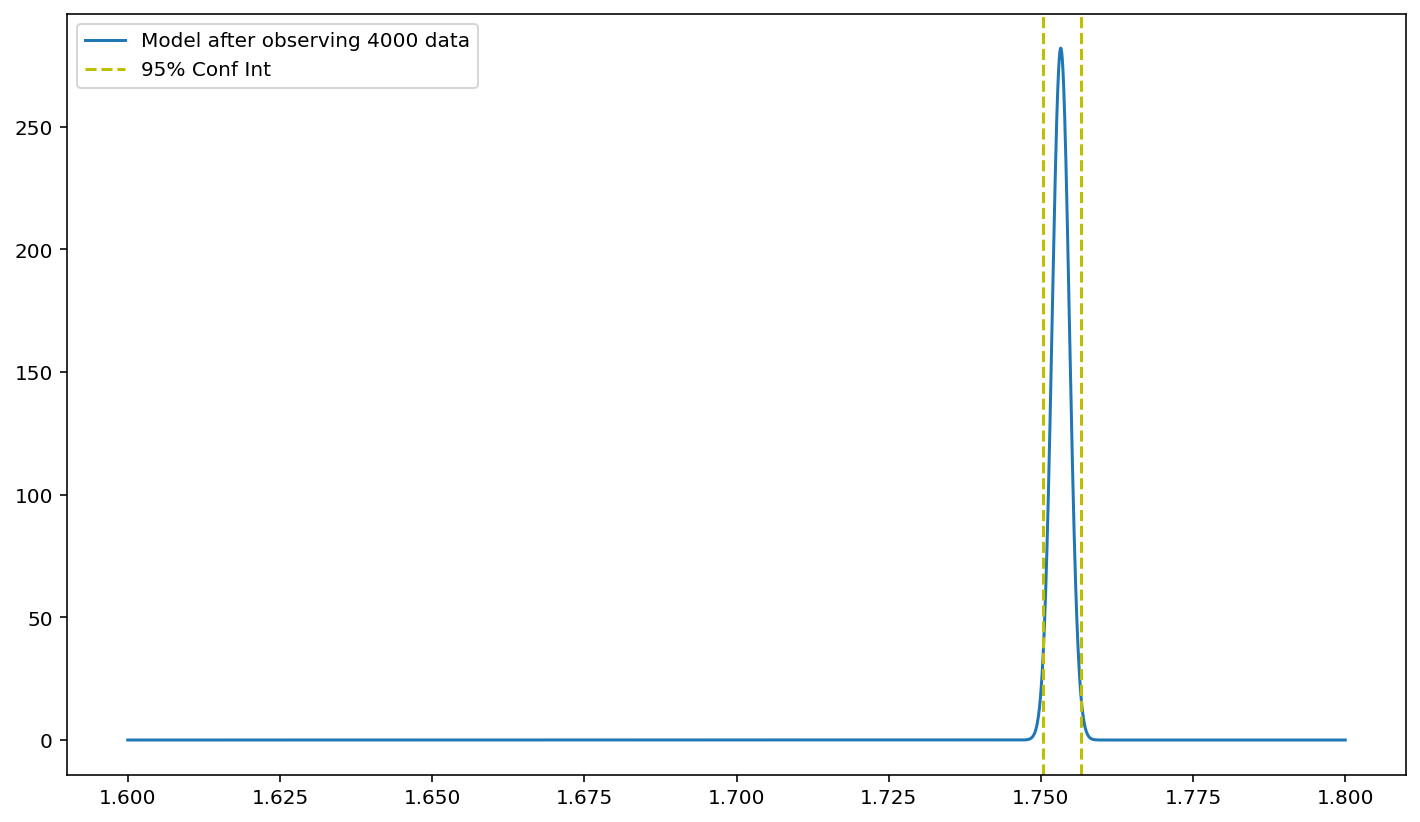

In [14]:
plt.plot(mu, normalized_posterior, label = f'Model after observing {4000} data')
plt.axvline(x = compute_percentile(mu, posterior_dict[4000], 0.025), ls = '--', color = 'y', label = '95% Conf Int')
plt.axvline(x = compute_percentile(mu, posterior_dict[4000], 0.975), ls = '--', color = 'y')
plt.legend()